# 📈 Stock Market Prediction Using LSTM

This project predicts future stock prices using historical data from Yahoo Finance.  
We use LSTM (Long Short-Term Memory) networks — a type of Recurrent Neural Network — to learn from past patterns in stock prices.  
The target stock in this case is **Apple Inc. (AAPL)**.


In [2]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [3]:
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
2015-01-07,23.968967,24.069069,23.735394,23.846619,160423600
2015-01-08,24.889910,24.947747,24.180294,24.298194,237458000


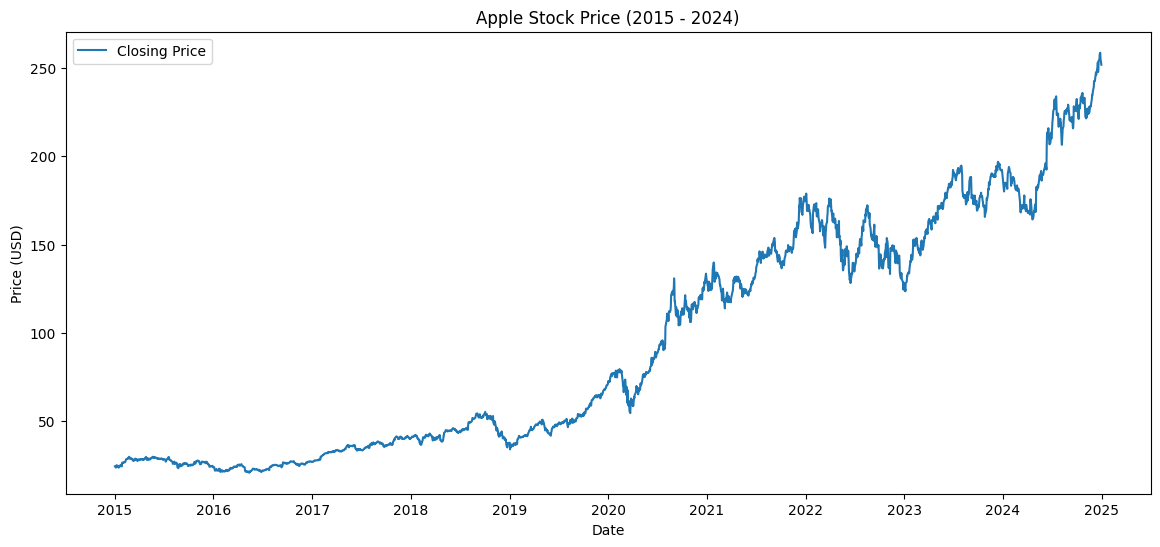

In [4]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Closing Price')
plt.title("Apple Stock Price (2015 - 2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [5]:
print(df.head())       # To see if your DataFrame has loaded correctly
print(df.columns)      # To check if 'Close' exists


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320433  24.789802  23.879981  24.778679  212818400
2015-01-05  23.635292  24.169172  23.448435  24.089090  257142000
2015-01-06  23.637514  23.897780  23.274920  23.699800  263188400
2015-01-07  23.968967  24.069069  23.735394  23.846619  160423600
2015-01-08  24.889910  24.947747  24.180294  24.298194  237458000
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [6]:
df = yf.download('AAPL', start='2012-01-01', end='2022-01-01')


[*********************100%***********************]  1 of 1 completed


In [7]:
data = df['Close']['AAPL'].to_frame()
  # Make sure 'Close' is there
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)



In [8]:
# Create training data
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM input [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Prediction of the next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()



C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#TRAIN THE MODEL

In [11]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - loss: 0.0184
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0012
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0012
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 9.6356e-04
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0011
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0011
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0011
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 8.2927e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 8.6635e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 9.2152e-04


In [12]:
#PLOTTING PREDICTIONS

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step


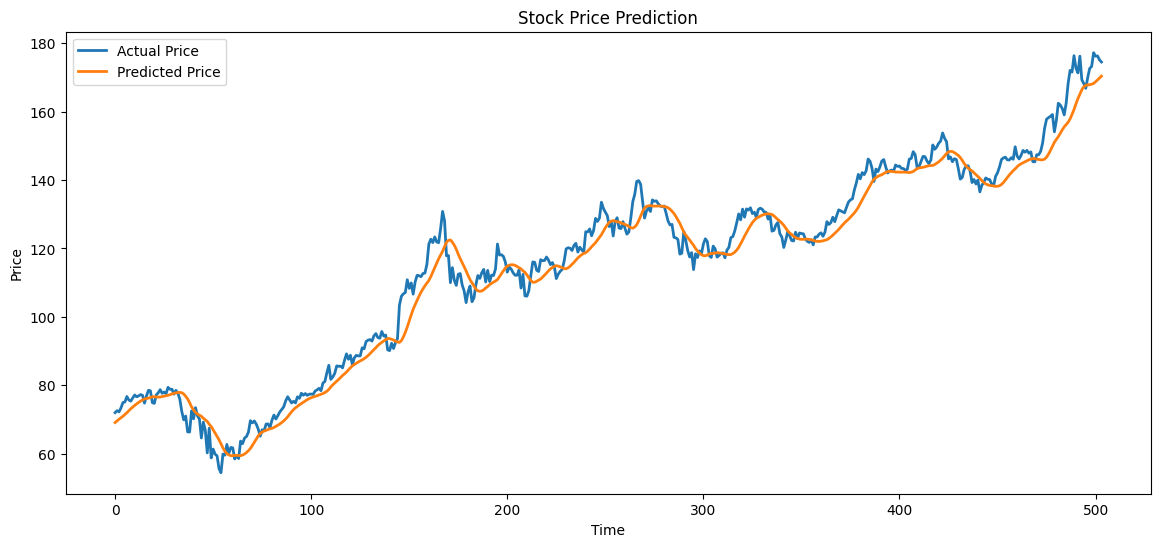

In [13]:
# Get the actual closing prices for testing (we’ll use the last 20% of data for testing)
training_data_len = int(len(scaled_data) * 0.8)
test_data = scaled_data[training_data_len - 60:]

X_test = []
y_test = scaled_data[training_data_len:]

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get model predictions
predictions = model.predict(X_test)

# Undo scaling
from sklearn.metrics import mean_squared_error
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(actual_prices, label="Actual Price", linewidth=2)
plt.plot(predicted_prices, label="Predicted Price", linewidth=2)
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [15]:
model.save("lstm_model.keras")
